<h1 align=center style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
فرمت مناسب و داده‌های پرت
</font>
</h1>

<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
در این بخش، مقادیر ستون‌ها را به فرمتی استاندارد در می‌آوریم که در انجام تحلیل‌ها و فراخوانی متدها به مشکلی برنخوریم. ابتدا فایلی که از بخش قبل به دست آمد را می‌خوانیم:
</font>
</p>

<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
خواندن داده
</font>
</h2>

In [2]:
import pandas as pd

housing_no_missing = pd.read_csv('../1_fill_missing_values/housing_no_missing.csv', encoding='gbk')
housing_no_missing.head()

Lng        Lat   tradeTime     DOM  totalPrice  square  livingRoom  \
0  116.475489  40.019520  2016-08-09  1464.0       415.0  131.00           2   
1  116.453917  39.881534  2016-07-28   903.0       575.0  132.38           2   
2  116.561978  39.877145  2016-12-11  1271.0      1030.0  198.00           3   
3  116.438010  40.076114  2016-09-30   965.0       297.5  134.00           3   
4  116.428392  39.886229  2016-08-28   927.0       392.0   81.00           2   

   drawingRoom  kitchen  bathRoom floor constructionTime  renovationCondition  \
0            1        1         1  高 26             2005                    3   
1            2        1         2  高 22             2004                    4   
2            2        1         3   中 4             2005                    3   
3            1        1         1  底 21             2008                    1   
4            1        1         1   中 6             1960                    2   

   buildingStructure  ladderRatio  elevator  subway  district  
0                  6        0.217       1.0     1.0         7  
1                  6        0.667       1.0     0.0         7  
2                  6        0.500       1.0     0.0         7  
3                  6        0.273       1.0     0.0         6  
4                  2        0.333       0.0     1.0         1

<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
فرمت مناسب برای داده‌های طبقه‌بندی شده
</font>
</h2>

<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
تعدادی از ستون‌ها، داده‌های طبقه‌بندی شده هستند. ستون‌هایی مانند آسانسور، جنس ساختمان، شرایط بازسازی و غیره. برای نمایش بهتر داده‌ها این اعداد را به معادل رشته‌ای آن‌ها‌ تبدیل می‌کنیم. همچنین متدهایی مانند هیستوگرام رابط پانداس، بر روی ستون‌های عددی عمل می‌کنند و اگر این ستون‌ها را به عدد تبدیل نکنیم، هیستوگرام‌هایی اشتباه تولید خواهند شد.
</font>
</p>



<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
قسمت اول
</font>
</h2>
<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
مقادیر ستون‌های <code>elevator</code>، <code>buildingStructure</code>، <code>renovationCondition</code> و <code>subway</code> را مطابق مقادیر زیر تغییر دهید و در یک دیتافریم جدید به نام <code>housing_categorical</code> ذخیره کنید.
<div dir=ltr id="start" style="direction:rtl;line-height:200%;">
	<font face="vazir" size=3>
<code>
<b>elevator</b>
<br>
1 : 'has elevator' 
<br>
0 : 'no elevator'
<br>
<br>
<b>subway</b>
<br>
1 : 'has subway'
<br>
0 : 'no subway'
<br>
<br>
<b>buildingStructure</b>
<br>
1 : 'unknown'
<br>            
2 : 'mixed'
<br>
                           3 : 'brick and wood' 
<br>
                           4 : 'concrete'
<br>
                           5 : 'steel'
<br>
                           6 : 'steel-concrete composite'
<br>
<br>
<b>renovationCondition</b>
<br>
1 : 'other',
<br>
                             2 : 'rough'
<br>
                             3 : 'Simplicity'
<br>
                             4 : 'hardcover'
<br>
</code>
</font>
</p>

In [3]:
housing_categorical = housing_no_missing.copy()


housing_categorical['elevator'] = housing_categorical['elevator'].map({1: 'has elevator', 0: 'no elevator'})

housing_categorical['subway'] = housing_categorical['subway'].map({1: 'has subway', 0: 'no subway'})

housing_categorical['buildingStructure'] = housing_categorical['buildingStructure'].map({1: 'unknown', 2: 'mixed', 3: 'brick and wood', 4: 'concrete', 5: 'steel', 6: 'steel-concrete composite'})

housing_categorical['renovationCondition'] = housing_categorical['renovationCondition'].map({1: 'other', 2: 'rough', 3: 'Simplicity', 4: 'hardcover'})

housing_categorical

Lng        Lat   tradeTime     DOM  totalPrice  square  \
0       116.475489  40.019520  2016-08-09  1464.0       415.0  131.00   
1       116.453917  39.881534  2016-07-28   903.0       575.0  132.38   
2       116.561978  39.877145  2016-12-11  1271.0      1030.0  198.00   
3       116.438010  40.076114  2016-09-30   965.0       297.5  134.00   
4       116.428392  39.886229  2016-08-28   927.0       392.0   81.00   
...            ...        ...         ...     ...         ...     ...   
318814  116.546899  39.755236  2016-06-10     1.0       350.0  170.07   
318815  116.497474  39.810115  2016-06-10     1.0       108.8   35.09   
318816  116.497256  39.804081  2016-06-05     1.0       359.0  102.17   
318817  116.501794  39.799347  2016-06-12     1.0       720.0  178.34   
318818  116.497474  39.810115  2016-06-11     1.0       450.0   92.45   

        livingRoom  drawingRoom  kitchen  bathRoom floor constructionTime  \
0                2            1        1         1  高 26             2005   
1                2            2        1         2  高 22             2004   
2                3            2        1         3   中 4             2005   
3                3            1        1         1  底 21             2008   
4                2            1        1         1   中 6             1960   
...            ...          ...      ...       ...   ...              ...   
318814           3            2        1         2   中 5             2003   
318815           1            0        1         1  中 24             2009   
318816           2            2        1         2   中 7             2000   
318817           4            2        1         2   中 5             2003   
318818           2            1        1         1  中 17               未知   

       renovationCondition         buildingStructure  ladderRatio  \
0               Simplicity  steel-concrete composite        0.217   
1                hardcover  steel-concrete composite        0.667   
2               Simplicity  steel-concrete composite        0.500   
3                    other  steel-concrete composite        0.273   
4                    rough                     mixed        0.333   
...                    ...                       ...          ...   
318814               other  steel-concrete composite        0.333   
318815               other  steel-concrete composite        0.222   
318816          Simplicity  steel-concrete composite        0.500   
318817           hardcover                     mixed        0.500   
318818           hardcover  steel-concrete composite        1.000   

            elevator      subway  district  
0       has elevator  has subway         7  
1       has elevator   no subway         7  
2       has elevator   no subway         7  
3       has elevator   no subway         6  
4        no elevator  has subway         1  
...              ...         ...       ...  
318814   no elevator   no subway         3  
318815  has elevator  has subway         3  
318816  has elevator   no subway         3  
318817   no elevator   no subway         3  
318818  has elevator  has subway         3  

[318819 rows x 18 columns]

<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
بیایید بار دیگر نگاهی به نوع ستون‌ها بیندازیم:
</font>
</p>

In [4]:
housing_categorical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318819 entries, 0 to 318818
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Lng                  318819 non-null  float64
 1   Lat                  318819 non-null  float64
 2   tradeTime            318819 non-null  object 
 3   DOM                  318819 non-null  float64
 4   totalPrice           318819 non-null  float64
 5   square               318819 non-null  float64
 6   livingRoom           318819 non-null  int64  
 7   drawingRoom          318819 non-null  int64  
 8   kitchen              318819 non-null  int64  
 9   bathRoom             318819 non-null  int64  
 10  floor                318819 non-null  object 
 11  constructionTime     318819 non-null  object 
 12  renovationCondition  318819 non-null  object 
 13  buildingStructure    318819 non-null  object 
 14  ladderRatio          318819 non-null  float64
 15  elevator         

<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
فرمت مناسب برای داده‌های عددی
</font>
</h2>


<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
ستونهایی که مقدار رشته‌ای دارند، از نوع <code>Object</code> هستند. اگر بیشتر دقت کنید، می‌بینید که بعضی از ستون‌های عددی (مانند سال ساخته‌ شدن خانه و ارتفاع خانه) هم از جنس <code>object</code> هستند. در قدم بعدی این ستون‌ها را به مقدار عددی تبدیل می‌کنیم.
<br>
بهتر است ابتدا با متد  <code>unique</code>، مقادیر یکتای این ستون‌ها را ببینیم:
</font>
</p>


In [5]:
print('constructionTime : ',housing_categorical.constructionTime.unique())
print('floor : ',housing_categorical.floor.unique())


constructionTime :  ['2005' '2004' '2008' '1960' '1997' '2009' '2006' '1991' '2001' '1990'
 '2011' '2000' '1998' '2010' '1996' '1993' '2002' '未知' '2012' '1989'
 '2003' '2007' '1994' '1984' '1992' '2014' '1985' '2013' '1999' '1979'
 '1981' '1976' '1982' '1975' '1983' '1986' '1995' '1965' '1988' '1987'
 '2015' '1955' '1980' '1978' '1958' '1970' '1956' '1977' '1964' '1963'
 '1967' '2016' '1974' '1973' '1959' '1954' '1962' '1966' '1957' '1944'
 '1972' '1971' '1953' '1968' '1961' '1950' '1952' '1933' '1969' '1906'
 '1934' '1914']
floor :  ['高 26' '高 22' '中 4' '底 21' '中 6' '中 8' '高 6' '高 10' '中 23' '底 11' '底 3'
 '高 24' '低 23' '中 19' '高 18' '低 25' '中 12' '中 14' '中 30' '中 27' '中 5'
 '低 18' '底 28' '中 11' '低 9' '顶 7' '顶 27' '低 6' '中 17' '顶 6' '中 24' '中 15'
 '底 5' '中 29' '顶 19' '顶 5' '中 9' '低 22' '顶 18' '低 16' '高 13' '高 9' '高 17'
 '底 6' '中 28' '低 26' '底 15' '高 16' '底 2' '低 7' '中 13' '低 33' '底 14' '高 15'
 '底 4' '顶 11' '中 32' '顶 16' '底 18' '顶 17' '低 14' '低 10' '底 20' '高 12'
 '低 31' '低 30' '低 19' '低

<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
قسمت دوم
</font>
</h2>
<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
نگاهی به مقادیر یکتای ستون <code>constructionTime</code> بیندازید. برای بعضی از خانه‌ها یک عبارت چینی قرار داده‌ شده که به معنی عبارت (نامشخص) می‌باشد. تعداد این خانه‌ها کم می‌باشد و می‌توانیم خانه‌هایی که سال ساخت آن‌ها نامشخص است را حذف کنیم (البته شاید بهتر باشد که به جای حذف این خانه‌ها، میانگین سال ساخت یا مد سال ساخت را قرار داد. انتخاب رویکرد مناسب برای مقادیر گمشده یا نامشخص به ماهیت مسئله و نیازهای ما بستگی دارد).
<br>
خانه‌هایی که سال ساخت آنها مشخص نیست را حذف کنید و پس از آن نوع ستون <code>constructionTime</code> را به <code>int</code> تغییر دهید. نام دیتا‌فریم جدید را برابر <code>Housing_construction</code> قرار دهید.
</font>
</p>

In [9]:
Housing_construction = housing_categorical.copy()

Housing_construction = pd.read_csv('../1_fill_missing_values/housing_no_missing.csv', encoding='gbk', na_values={"constructionTime": '未知'})

Housing_construction.dropna(subset=['constructionTime'], inplace=True)

Housing_construction['constructionTime'] = Housing_construction['constructionTime'].to_numpy('int32')

Housing_construction.info()

print('constructionTime : ',housing_categorical.constructionTime.unique())

Housing_construction.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 299536 entries, 0 to 318817
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Lng                  299536 non-null  float64
 1   Lat                  299536 non-null  float64
 2   tradeTime            299536 non-null  object 
 3   DOM                  299536 non-null  float64
 4   totalPrice           299536 non-null  float64
 5   square               299536 non-null  float64
 6   livingRoom           299536 non-null  int64  
 7   drawingRoom          299536 non-null  int64  
 8   kitchen              299536 non-null  int64  
 9   bathRoom             299536 non-null  int64  
 10  floor                299536 non-null  object 
 11  constructionTime     299536 non-null  int32  
 12  renovationCondition  299536 non-null  int64  
 13  buildingStructure    299536 non-null  int64  
 14  ladderRatio          299536 non-null  float64
 15  elevator         

Lng        Lat   tradeTime     DOM  totalPrice  square  livingRoom  \
0  116.475489  40.019520  2016-08-09  1464.0       415.0  131.00           2   
1  116.453917  39.881534  2016-07-28   903.0       575.0  132.38           2   
2  116.561978  39.877145  2016-12-11  1271.0      1030.0  198.00           3   
3  116.438010  40.076114  2016-09-30   965.0       297.5  134.00           3   
4  116.428392  39.886229  2016-08-28   927.0       392.0   81.00           2   

   drawingRoom  kitchen  bathRoom floor  constructionTime  \
0            1        1         1  高 26              2005   
1            2        1         2  高 22              2004   
2            2        1         3   中 4              2005   
3            1        1         1  底 21              2008   
4            1        1         1   中 6              1960   

   renovationCondition  buildingStructure  ladderRatio  elevator  subway  \
0                    3                  6        0.217       1.0     1.0   
1                    4                  6        0.667       1.0     0.0   
2                    3                  6        0.500       1.0     0.0   
3                    1                  6        0.273       1.0     0.0   
4                    2                  2        0.333       0.0     1.0   

   district  
0         7  
1         7  
2         7  
3         6  
4         1

<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
قسمت سوم
</font>
</h2>
<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
حالا می‌رویم سراغ ستون <code>floor</code> که داستانش کمی فرق دارد. در خانه‌های این ستون ابتدا یک کلمه چینی و پس از آن یک عدد قرار گرفته است. عدد بعد از کاراکتر چینی ارتفاع خانه را نشان می‌دهد. پس از کمک گرفتن از مترجم گوگل، متوجه شدیم که کلمات، معادل بالا و پایین و متوسط هستند. می‌توان این ستون را به دو ستون متفاوت تبدیل کرد ولی ما اینجا عبارات چینی را دور می‌ریزیم و فقط اعداد را نگه می‌داریم.
<br>
ستون <code>floor</code> را طوری تغییر دهید که فقط اعداد باقی بمانند و نوع داده‌های ستون <code>floor</code> را با استفاده از توابع پانداس به <code>int</code> تبدیل کنید. نام دیتافریم جدید را برابر <code>housing_floor</code> قرار دهید. 
</font>
</p>


In [10]:

housing_floor = Housing_construction.copy()

housing_floor['floor'] = housing_floor['floor'].str.extract('(\d+)').to_numpy('int32')

housing_floor.shape

(299536, 18)

<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
اگر مراحل را به درستی انجام داده باشید، باید نوع ستون‌ها به شکل زیر باشد:
</font>
</p>


In [11]:
housing_floor.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 299536 entries, 0 to 318817
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Lng                  299536 non-null  float64
 1   Lat                  299536 non-null  float64
 2   tradeTime            299536 non-null  object 
 3   DOM                  299536 non-null  float64
 4   totalPrice           299536 non-null  float64
 5   square               299536 non-null  float64
 6   livingRoom           299536 non-null  int64  
 7   drawingRoom          299536 non-null  int64  
 8   kitchen              299536 non-null  int64  
 9   bathRoom             299536 non-null  int64  
 10  floor                299536 non-null  int32  
 11  constructionTime     299536 non-null  int32  
 12  renovationCondition  299536 non-null  int64  
 13  buildingStructure    299536 non-null  int64  
 14  ladderRatio          299536 non-null  float64
 15  elevator         

<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
داده‌های پرت
</font>
</h2>

<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
ممکن است خانه‌هایی بسیار بزرگ یا بسیار گران باشند یا برعکس، خانه‌‌هایی باشند که بیش از حد ارزان یا کوچک باشد و فاصله بسیاری با میانگین داشته‌ باشند. در بعضی امور تحلیل داده‌ای، داده پرت می‌تواند نتایج را به شکلی نامطلوب تغییر دهد. برای مثال، نمودار‌ها به شکلی نامفهوم در می‌آیند یا در کارهای یادگیری ماشین، این داده‌ها ممکن است الگوریتم را به اشتباه بیندازند. در این قسمت بعضی از خانه‌ها که یک یا چند ویژگی پرت یا غیر معمول دارند را حذف می‌کنیم.
</font>
</p>

<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
یکی از بهترین روشهای شناسایی و حذف داده‌های پرت، استفاده از چارک‌ها و نمودار جعبه‌ای می‌باشد. 
<br>
نمودار جعبه‌ای ستون قیمت را رسم می‌کنیم.
</font>
</p>

<AxesSubplot:>

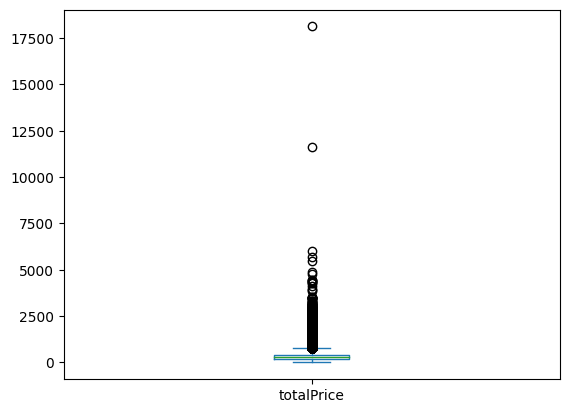

In [12]:
housing_floor.totalPrice.plot(kind = 'box')

<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
بعضی داده ها آنقدر پرت هستند که نمودار جعبه‌ای از حالت جعبه خارج شده است. نقاطی که در بالای نمودار هستند، داده‌های بسیار پرت می‌باشند.
<br>
با موضوع حذف داده‌های پرت در درسنامه <<حذف دادگان>>  آشنا شدید. برای حذف مقادیر پرت، از چارک اول و سوم برای انتخاب ناحیه مناسب استفاده می کنیم.  این ناحیه که <code>IQR</code> نام دارد، اختلاف چارک اول و سوم می‌باشد. سپس عددی در <code>IQR</code> ضرب می‌شود و مقادیری که کمتر یا بیشتر از این ناحیه جدید هستند، حذف می‌شوند. معمولا این فاکتور(عددی که در <code>IQR</code> ضرب می‌شود) را برابر ۱.۵ در نظر می‌گیرند و از فاکتور ۳ برای شناسایی داده‌های خیلی پرت استفاده می‌شود.در ادامه از فاکتور ۱.۵ استفاده خواهیم کرد.
</font>
</p>


<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
قسمت چهارم
</font>
</h2>
<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
خانه‌هایی که قیمت کلی آنها در محدوده یک و نیم برابری فاصله میان‌چارکی قرار نمی‌گیرد را حذف کنید و در دیتافریم <code>housing_no_outlier</code> قرار دهید. اگر مراحل را درست انجام دهید باید ۱۴۴۹۶ خانه حذف شود.
</font>
</p>


In [19]:
housing_no_outlier = housing_floor.copy()

seri = housing_no_outlier['totalPrice']

Q1 = seri.quantile(0.25)
Q3 = seri.quantile(0.75)
IQR = Q3 - Q1
mask = housing_floor[(seri.values < Q1-1.5*IQR) | (seri.values > Q3+1.5*IQR)].index
housing_no_outlier.drop(housing_floor[mask] ,inplace=True)
housing_floor.shape[0] - housing_no_outlier.shape[0]
housing_no_outlier


KeyError: "None of [Int64Index([     2,      7,     10,     12,     13,     20,     23,     24,\n                28,     30,\n            ...\n            317175, 317177, 317193, 317211, 317331, 317363, 317764, 318302,\n            318452, 318659],\n           dtype='int64', length=14496)] are in the [columns]"

<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
نگاهی هم به نمودار میله‌ای ستون <code>totalPrice</code> بیندازیم. همانطور که می‌بینید، نمودار حالتی طبیعی‌تر به خود گرفته‌است:
</font>
</p>

<AxesSubplot:>

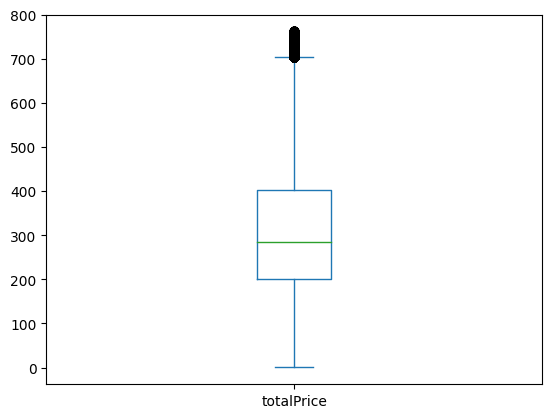

In [65]:
housing_no_outlier.totalPrice.plot(kind = 'box')

<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
دیتافریم را برای استفاده در مرحله بعد ذخیره می‌کنیم.
</font>
</p>

In [66]:
housing_no_outlier.to_csv('housing_no_outlier.csv', encoding='gbk', index=False)


<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
<b>سلول جواب‌ساز</b>
</font>
</h2>


In [67]:
import zipfile
import joblib

joblib.dump(housing_categorical.head(100),"housing_categorical") 
joblib.dump(Housing_construction.head(100),"Housing_construction")
joblib.dump(housing_floor.head(100),"housing_floor")
joblib.dump(housing_no_outlier.head(100),"housing_no_outlier")

def compress(file_names):
    print("File Paths:")
    print(file_names)
    # Select the compression mode ZIP_DEFLATED for compression
    # or zipfile.ZIP_STORED to just store the file
    compression = zipfile.ZIP_DEFLATED
    # create the zip file first parameter path/name, second mode
    with zipfile.ZipFile("result.zip", mode="w") as zf:
        for file_name in file_names:
            # Add file to the zip file
            # first parameter file to zip, second filename in zip
            zf.write('./' + file_name, file_name, compress_type=compression)

file_names = ["housing_categorical","Housing_construction","housing_floor","housing_no_outlier", "2_correct_format_and_outliers.ipynb"]
compress(file_names)

File Paths:
['housing_categorical', 'Housing_construction', 'housing_floor', 'housing_no_outlier', '2_correct_format_and_outliers.ipynb']
